In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import normal

In [159]:
np.random.seed(0)

N = 10 # 관측점/관측값 개수 {(x_n, t_n)} (n=1,...,N)
Ms = [0,1,3,9] # 최소제곱법 다항식 차수 리스트

In [160]:
# 최소제곱법에 사용할 "램덤" 데이터 셋 생성 함수
# N개의 관측점/관측값 {(x_n, y_n)}을 포함하는 DataFrame 생성하여 반환
def create_dataset(N):
    dataset = pd.DataFrame(columns=['x','t'])
    for i in range(N):
        x = float(i)/float(N-1)
        t = np.sin(2*np.pi*x) + normal(scale = 0.3)
            # scale은 standard deviation.
        dataset = dataset.append(pd.Series([x,t],index=['x','t']),
                                 ignore_index = True)
            # pandas.DataFrame.append(): 새로운 객체 반환. index가 0,1,...
    return dataset

Text(0.5, 1.0, 'training set')

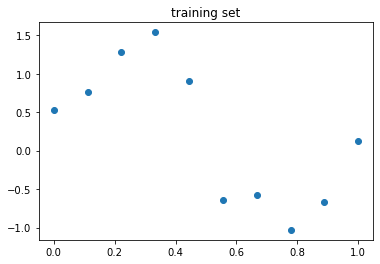

In [161]:
# 트레이닝 데이터 셋 생성
training_set = create_dataset(N) # 위에서 정의한 관측점/관측값 개수 N

# N개의 관측점/관측값 가지는 트레이닝 셋 DataFrame 출력
training_set

# 트레이닝 셋 그래프 출력
x = training_set['x'] # x는 pandas.core.series.Series 객체.
t = training_set['t'] # t는 pandas.core.series.Series 객체.

plt.scatter(x,t)
plt.title('training set')

In [162]:
# 함수 선언
def calc_phi(dataset, M):
    dataset = training_set.copy()
    x = dataset.x.values.reshape(-1,1)
    phi = np.repeat(x, M+1, axis = 1)
    phi = np.power(phi, np.arange(M+1))
    return phi

def calc_t(dataset):
    return dataset.t.values.reshape(-1,1)

def calc_w(training_set, M):
    phi = calc_phi(training_set,M)
    t = calc_t(training_set)

    phiT_phi_inv = np.linalg.inv(phi.T.dot(phi))
    w = np.linalg.multi_dot([phiT_phi_inv,phi.T,t])
    return w

def calc_polynomial(w, xs):
    ys = np.zeros(xs.size)
    for i, w_i in enumerate(w):
        ys += w_i * (xs ** i)
    return ys

# 제곱근 평균 제곱 오차(Root mean square error) 계산
def calc_rms_error(dataset, w):
    err = 0.0
    # x value: line.x  t value: line.t
    for _, line in dataset.iterrows(): # (index, Series) pairs.
        x, t = line.x, line.t
        err += 0.5 * (calc_polynomial(w,x)-t)**2
    rms_error = np.sqrt(2 * err / len(dataset))
    return rms_error

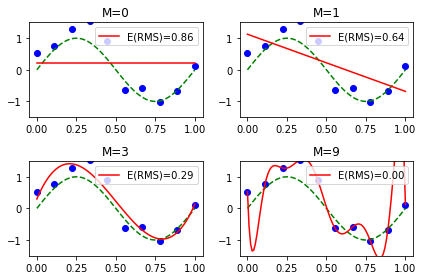

In [163]:
# 최소제곱법으로 구한 0, 1, 3, 9차 다항식 시각화
fig = plt.figure()

for c, M in enumerate(Ms):
    w = calc_w(training_set,M)
    rms_error = calc_rms_error(training_set,w)

    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % M)

    # 트레이닝 셋 표시
    subplot.scatter(training_set.x, training_set.t, marker='o', color='blue')

    # sin 곡선 표시
    linex = np.linspace(0,1,101) # numpy.ndarray (101,)
    liney = np.sin(2*np.pi*linex) # numpy.ndarray (101,)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 다항식 근사 곡선 표시
    linex = np.linspace(0,1,101)
    liney = calc_polynomial(w, linex)

    # error값 표시
    label = ""
    label = "E(RMS)=%.2f" % rms_error
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)

fig.tight_layout()

